In [2]:
%matplotlib inline
import sys
# add zip executable to python path
sys.path.append('rffdtd') 
import matplotlib.pyplot as plt
import numpy as np
from rffdtd import simulate, read_touchstone

In [3]:
def plot(freq, sparam, fl=0, fu=1e20, ports=None):
    figsize = (10, 7)
    fig, ax = plt.subplots(figsize=figsize)
    i, j = np.argmin(abs(freq - fl)), np.argmin(abs(freq - fu))
    for n in range(sparam.shape[2]):
        for m in range(sparam.shape[1]):
            if np.all(sparam[:,m,n] == 1): continue
            if (ports is None or (m+1,n+1) in ports):
                db = 20 * np.log10(abs(sparam[:,m,n]))
                ax.plot(freq[i:j] / 1e9, db[i:j], label=f'S{m+1}{n+1}')
    plt.xlabel("GHz")
    plt.ylabel("dB")
    plt.legend()
    plt.show()
    return
    fig, ax = plt.subplots(figsize=figsize)
    for n in range(sparam.shape[2]):
        for m in range(sparam.shape[1]):
            if np.all(sparam[:,m,n] == 1): continue
            if (ports is None or (m+1,n+1) in ports):
                ph = np.angle(sparam[:,m,n], deg=True)
                ax.plot(freq[i:j] / 1e9, ph[i:j], label=f'S{m+1}{n+1}')
    plt.xlabel("GHz")
    plt.ylabel("Deg")
    plt.legend()

1296 MHz Interdigital 3-Pole Butterworth Filter, 110 MHz Bandwidth.
Interdigital Bandpass Filters for Amateur V.H.F/U.H.F. Applications,
High-Q Filter Construction Made Easy, Reed Fisher, March 1968 QST;
reproduced in the ARRL Handbook 2017, p11.32, figure 11.63.
Grid is 90 x 28 x 68 mm in size or 171360 uniform cells.
Each individual simulation requires about 12.796 MiB of memory.
Using GPU device "cuda": NVIDIA GeForce GTX 1660 SUPER
  259628 / 259628 / 1    
FDTD simulation time: 5 min 57.68 sec


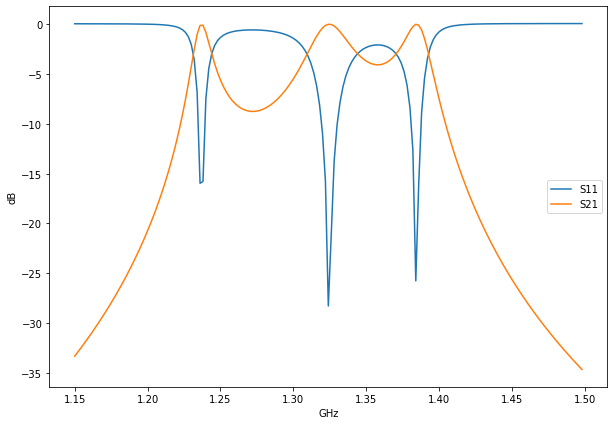

In [6]:
import sys
sys.path.append('examples')
import fisher
freq, sparam = simulate(fisher.design(), df=2e6, stop=1, ds=1e-3)
plot(freq, sparam, 1.15e9, 1.5e9)

Microstrip Lowpass Filter.
The Finite-Differnce Time-Domain Method for Electromagnetics with 
MATLAB Simulations, Elsherbeni and Demir.  Section 6.2.
Reproduced from Application of the Three-Dimensional Finite-Difference
Time-Domain Method to the Analysis of Planar Microstrip Circuits,
David Sheen, Sami Ali, IEEE MTT Vol 38, No 7, July 1990, p.849.
Grid is 27.456 x 24.552 x 9.504 mm in size or 348192 uniform cells.
Each individual simulation requires about 16.127 MiB of memory.
Using GPU device "cuda": NVIDIA GeForce GTX 1660 SUPER
  9834 / 9834 / 2    
FDTD simulation time: 0 min 27.75 sec


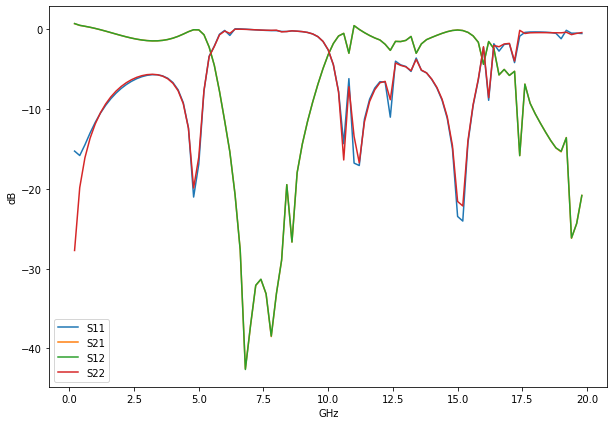

In [4]:
freq, sparam = simulate("examples/lowpass.zip", df=200e6, ds=.264e-3)
plot(freq, sparam, fu=20e9)

Microstrip Microwave Four Port Coupler.
The Finite-Differnce Time-Domain Method for Electromagnetics with 
MATLAB Simulations, Elsherbeni and Demir.  Section 6.2.
Reproduced from Application of the Three-Dimensional Finite-Difference
Time-Domain Method to the Analysis of Planar Microstrip Circuits,
David Sheen, Sami Ali, IEEE MTT Vol 38, No 7, July 1990, p.849.
Grid is 21.384 x 41.448 x 9.504 mm in size or 457812 uniform cells.
Each individual simulation requires about 21.632 MiB of memory.
Using GPU device "cuda": NVIDIA GeForce GTX 1660 SUPER
  19669 / 19669 / 4    
FDTD simulation time: 2 min 33.77 sec


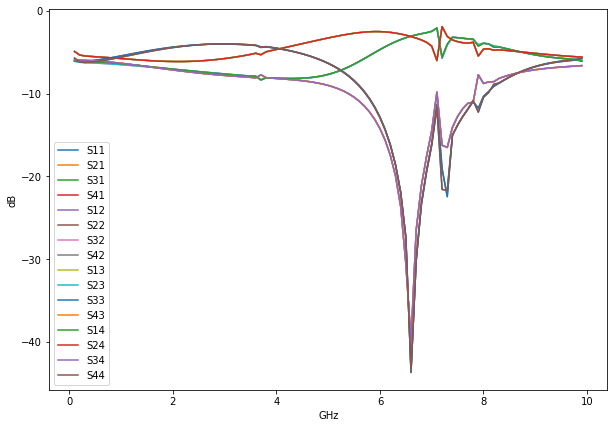

In [5]:
freq, sparam = simulate("examples/coupler.zip", df=100e6, ds=.264e-3)
plot(freq, sparam, fu=10e9)

435 Mhz interdigital butterworth bandpass filter, 16 Mhz bandwidth.
A Simple Way to Desgin Narrowband Interdigital Filters, Ian White, G3SEK.
Radio Communication, Feb 1984, p120.
Grid is 118 x 28 x 180 mm in size or 594720 uniform cells.
Each individual simulation requires about 37.128 MiB of memory.
Using GPU device "cuda": NVIDIA GeForce GTX 1660 SUPER
  519256 / 519256 / 1    
FDTD simulation time: 14 min 9.05 sec


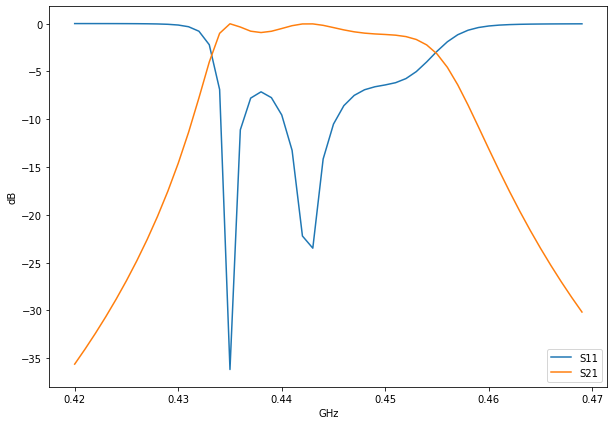

In [7]:
plot(*simulate("examples/white.zip", df=1e6, stop=1, ds=1e-3), 
     fl=420e6, fu=470e6)